## Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

## Data read-in

In [19]:
df = pd.read_csv('redfin_2023-10-18-13-14-03.csv')

In [20]:
df['SOLD DATE'] = pd.to_datetime(df['SOLD DATE'])

In [21]:
df = df.rename(columns={'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)':'URL'})

In [22]:
df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS', 'BATHS',
       'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET',
       '$/SQUARE FEET', 'HOA/MONTH', 'STATUS', 'NEXT OPEN HOUSE START TIME',
       'NEXT OPEN HOUSE END TIME', 'URL', 'SOURCE', 'MLS#', 'FAVORITE',
       'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

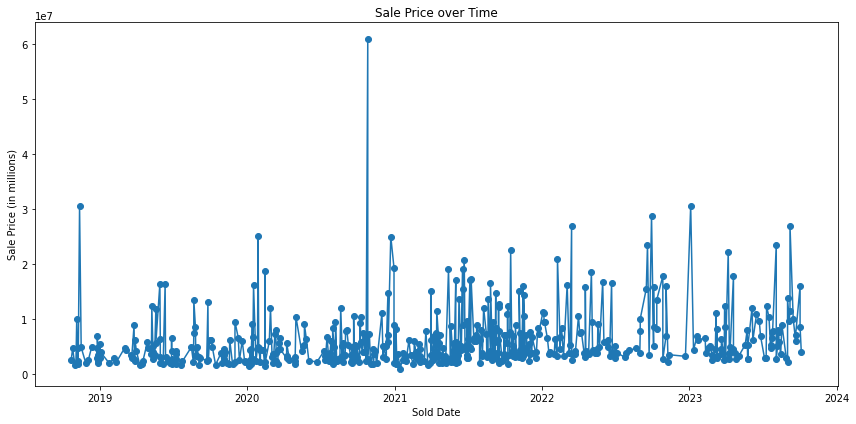

In [23]:
# Sort DataFrame based on 'SOLD DATE'
df = df.sort_values('SOLD DATE')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot_date(df['SOLD DATE'], df['PRICE'], linestyle='solid')
plt.title('Sale Price over Time')
plt.ylabel('Sale Price (in millions)')
plt.xlabel('Sold Date')
plt.tight_layout()

# Display the graph
plt.show()

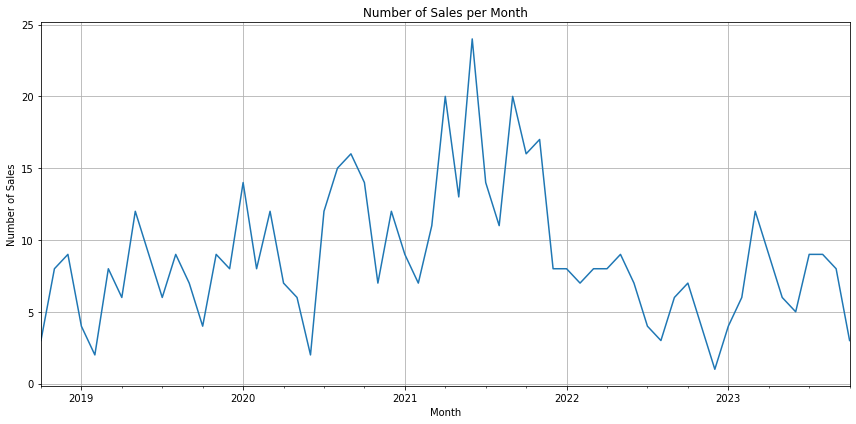

In [24]:
df.set_index('SOLD DATE', inplace=True)

# Count sales per month
monthly_sales = df.resample('M').size()

# Plot
monthly_sales.plot(figsize=(12,6))
plt.title('Number of Sales per Month')
plt.ylabel('Number of Sales')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

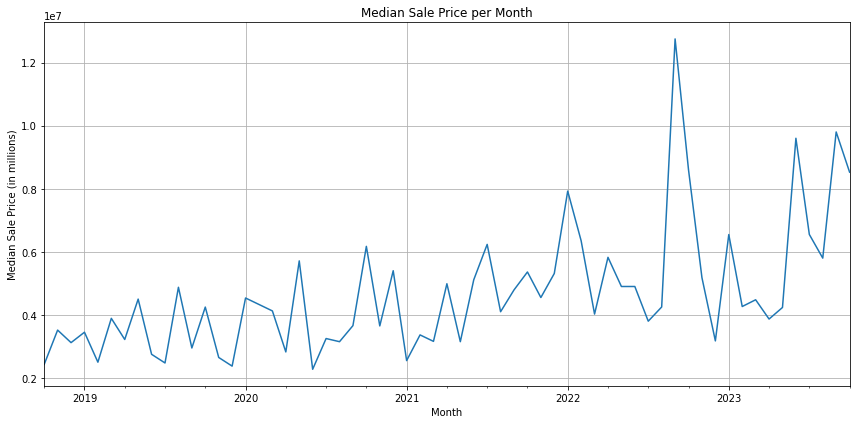

In [28]:
# Calculate median sale price per month
monthly_median_price = df.resample('M')['PRICE'].median()

# Plot
monthly_median_price.plot(figsize=(12,6))
plt.title('Median Sale Price per Month')
plt.ylabel('Median Sale Price (in millions)')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()


In [26]:
# Calculate monthly statistics
monthly_sales = df.resample('M').size()
monthly_median_price = df.resample('M')['PRICE'].median()

# Create a DataFrame for results
result = pd.DataFrame({
    'Number of Sales': monthly_sales,
    'Median Sale Price': monthly_median_price
})

In [27]:
result.to_csv('NewportCoast.csv')